# Cleaning Sequences
There are multiple ways of sequencing the steps in your data cleaning process. We've used one so far, once in Lesson 1 and once in the **Data Cleaning Process** example video in this lesson. The **Define**, **Code**, and **Test** Markdown headers were used once in this sequence, with multiple definitions, cleaning operations, and tests under each header, respectively.

It looked like this:

______

## Gather

In [610]:
import pandas as pd
import numpy as np
import re
import requests
import tweepy
import timeit
import json
import matplotlib.pyplot as plt
%matplotlib inline

#### Keys

In [664]:
consumer_key = 'NOT SHOWN' 
consumer_secret = 'NOT SHOWN'

access_token = 'NOT SHOWN' 
access_token_secret = 'NOT SHOWN' 

In [9]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req = requests.get(url, auth=('user','pass'));
open('image_predictions.tsv', 'wb').write(req.content);

In [570]:
img_pred = pd.read_csv('image_predictions.tsv', sep='\t');

In [571]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv');

In [178]:
tweet_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [48]:
#Query Twitter API for Tweet JSON data
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#Call API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


#api.get_status(tweet_id, tweet_mode='extended')

In [51]:
num_tweets = 200
start = timeit.timeit()
tweets = []
deleted_tweets = []
#for tweet in tweepy.Cursor(api.user_timeline, screen_name='dog_rates').items(num_tweets):
#        tweets.append(tweet)
for tweet_id in tweet_archive.tweet_id:
    try:
        tweet = api.get_status(id=tweet_id)
        tweets.append(tweet)
    except tweepy.TweepError:
        deleted_tweets.append(tweet_id)
end = timeit.timeit()
print("Gathering Tweets took a total of ", end - start)

Rate limit reached. Sleeping for: 656
Rate limit reached. Sleeping for: 806


Gathering Tweets took a total of  -0.0006825880000178586


In [93]:
with open("tweet_json.txt","w") as file:
    for tweet in tweets:
        json.dump(tweet._json, file, ensure_ascii=False)
        file.write('\n')
#tmp = [[tweet.id_str, tweet.retweet_count, tweet.favorite_count, tweet.text.encode('utf-8')] for tweet in tweets]
#df = pd.read_csv(tweets_for_csv)


In [156]:
tweet_data = pd.DataFrame({}, columns =['tweet_id', 'description','retweet_count', 'favorite_count'])
json_data = []
with open("tweet_json.txt", "r") as file:
    for line in file:
        json_data = json.loads(line)
        df2 = pd.DataFrame({"tweet_id":[json_data['id']],
                            "description":[json_data["text"]],
                           "retweet_count": [json_data['retweet_count']],
                           'favorite_count': [json_data['favorite_count']]})
        tweet_data = tweet_data.append(df2, ignore_index=True)


In [158]:
tweet_data.head()

tweet_id                                        description  \
0  892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1  892177421306343426  This is Tilly. She's just checking pup on you....   
2  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3  891689557279858688  This is Darla. She commenced a snooze mid meal...   
4  891327558926688256  This is Franklin. He would like you to stop ca...   

  retweet_count favorite_count  
0          7923          37097  
1          5886          31916  
2          3888          24031  
3          8080          40416  
4          8759          38641

In [164]:
#enhanced_data = pd.merge(tweet_data, tweet_archive, on = 'tweet_id')

In [165]:
#enhanced_data.head()

In [166]:
#enhanced_data.info()

## Assess

In [189]:
tweet_data.head()

tweet_id                                        description  \
0  892420643555336193  This is Phineas. He's a mystical boy. Only eve...   
1  892177421306343426  This is Tilly. She's just checking pup on you....   
2  891815181378084864  This is Archie. He is a rare Norwegian Pouncin...   
3  891689557279858688  This is Darla. She commenced a snooze mid meal...   
4  891327558926688256  This is Franklin. He would like you to stop ca...   

  retweet_count favorite_count  
0          7923          37097  
1          5886          31916  
2          3888          24031  
3          8080          40416  
4          8759          38641

In [190]:
tweet_data.describe()

tweet_id                                        description  \
count                 2333                                               2333   
unique                2333                                               2333   
top     667495797102141441  Super rare dog here. Spiffy mohawk. Sharp mout...   
freq                     1                                                  1   

        retweet_count  favorite_count  
count            2333            2333  
unique           1712            1989  
top               556               0  
freq                7             165

In [191]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
tweet_id          2333 non-null object
description       2333 non-null object
retweet_count     2333 non-null object
favorite_count    2333 non-null object
dtypes: object(4)
memory usage: 73.0+ KB


In [387]:
tweet_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [388]:
tweet_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [395]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [409]:
tweet_archive.query('not (expanded_urls > \'0\')' ).head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30   886267009285017600           8.862664e+17         2.281182e+09   
55   881633300179243008           8.816070e+17         4.738443e+07   
64   879674319642796034           8.795538e+17         3.105441e+09   
113  870726314365509632           8.707262e+17         1.648776e+07   
148  863427515083354112           8.634256e+17         7.759620e+07   

                     timestamp  \
30   2017-07-15 16:51:35 +0000   
55   2017-07-02 21:58:53 +0000   
64   2017-06-27 12:14:36 +0000   
113  2017-06-02 19:38:25 +0000   
148  2017-05-13 16:15:35 +0000   

                                                source  \
30   <a href="http://twitter.com/download/iphone" r...   
55   <a href="http://twitter.com/download/iphone" r...   
64   <a href="http://twitter.com/download/iphone" r...   
113  <a href="http://twitter.com/download/iphone" r...   
148  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
30   @NonWhiteHat @MayhewMayhem omg hello tanner yo...                  NaN   
55   @roushfenway These are good dogs but 17/10 is ...                  NaN   
64                     @RealKentMurphy 14/10 confirmed                  NaN   
113  @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...                  NaN   
148  @Jack_Septic_Eye I'd need a few more pics to p...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
30                        NaN                        NaN           NaN   
55                        NaN                        NaN           NaN   
64                        NaN                        NaN           NaN   
113                       NaN                        NaN           NaN   
148                       NaN                        NaN           NaN   

     rating_numerator  rating_denominator  name doggo floofer pupper puppo  
30                 12                  10  None  None    None   None  None  
55                 17                  10  None  None    None   None  None  
64                 14                  10  None  None    None   None  None  
113                10                  10  None  None    None   None  None  
148                12                  10  None  None    None   None  None

In [410]:
img_pred.head(40)

tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13  666082916733198337  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14  666094000022159362  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15  666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16  666102155909144576  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19  666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20  666287406224695296  https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21  666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22  666337882303524864  https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23  666345417576210432  https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24  666353288456101888  https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25  666362758909284353  https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26  666373753744588802  https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27  666396247373291520  https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28  666407126856765440  https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29  666411507551481857  https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
30  666418789513326592  https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31  666421158376562688  https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32  666428276349472768  https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
33  666430724426358785  https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
34  666435652385423360  https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
35  666437273139982337  https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36  666447344410484738  https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37  666454714377183233  https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38  666644823164719104  https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39  666649482315059201  https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   

    img_num                           p1   p1_conf  p1_dog  \
0         1       Welsh_springer_spaniel  0.465074    True   
1         1                      redbone  0.506826    True   
2         1              German_shepherd  0.596461    True   
3         1          Rhodesian_ridgeback  0.408143    True   
4         1           miniature_pinscher  0.560311    True   
5         1         Bernese_mountain_dog  0.651137    True   
6         1                   box_turtle  0.933012   False   
7         1                         chow  0.692517    True   
8         1                shopping_cart  0.962465   False   
9         1             miniature_poodle  0.201493    True   
10        1             golden_retriever  0.775930    True   
11        1                Gordon_setter  0.503672    True   
12        1                 Walker_hound  0.260857    True   
13        1                          pug  0.489814    True   
14      

In [411]:
img_pred.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [412]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


________

#### Quality

##### tweet_archive table
- Retweeted Tweets in Table
- Replied Tweets in Table
- Name column doesn't always list correct name
- Time Stamp not in date time
- 'None' is a string in dog class names
- Dog class should be 1 or 0 for whether or not dog is floofer, puppo, etc.
- Expanded URLS not listed for every tweet

##### img_pred table
- Dog Types are different cases
- Dog names separated by underscore and hyphen
- Dog names not strings

#### Tidiness

##### tweet_archive table
- X-Contents of doggo, pupper, floofer, etc. columns is redundant (One column for the four types)
- Many Redundant or not needed columns because retweets and replies are not included
- Merge retweet and favorite data with master
- Merge img_pred table with master

## Clean

#### Replied tweets in table

##### Define
Remove tweets that were replies to other users

##### Code

In [572]:
tweet_archive_clean = tweet_archive.drop(tweet_archive.query('in_reply_to_user_id > 0').index)

##### Test

In [573]:
tweet_archive_clean.query('in_reply_to_user_id > 0')

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

#### Retweets in table
##### Define
Remove tweets that were retweets

##### Code

In [574]:
tweet_archive_clean = tweet_archive.drop(tweet_archive.query('retweeted_status_user_id > 0').index)

##### Test

In [575]:
tweet_archive_clean.query('retweeted_status_user_id > 0')

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

#### Name column doesn't always list correct name
##### Define
Names are sometimes different parsed incorrectly from text

#### Code

In [576]:
tweet_archive_clean.name.value_counts().head(12)

None       680
a           55
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Lola         8
the          8
Winston      8
Sadie        8
Name: name, dtype: int64

We won't be able to clean every name, however, we can fix some of the ones that are currently broken.

In [577]:
for name in tweet_archive_clean.name:
    if name != None:
        if name[0].islower():
            tweet_archive_clean.name.replace(name, 'None', inplace=True)

#### Test

In [578]:
tweet_archive_clean.name.value_counts().head(12)

None       784
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Sadie        8
Winston      8
Lola         8
Daisy        7
Toby         7
Name: name, dtype: int64

We can see that many of the lower case names such as 'a' and 'the' have been removed so that the real name counts are more prevalent. 

#### Timestamp not in datetime
##### Define
Timestamp is not in datetime format

#### Code

In [579]:
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)

In [580]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns, UT

#### None is a string in Dog Class names 
##### Define
None should be Null or 0 so that it is easier to clean data

#### Code

In [581]:
tweet_archive_clean[['doggo','floofer','pupper','puppo']] = tweet_archive_clean[['doggo','floofer','pupper','puppo']].replace(to_replace = 'None', value= np.nan, regex=True)

#### Test

In [582]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns, UTC](1), 

#### Dog class values are redundant
##### Define
Dog classes (floofer, puppo, etc.) should be 0 or 1 to avoid redundancy.

#### Code

In [583]:
tweet_archive_clean[['doggo','floofer','pupper','puppo']] = tweet_archive_clean[['doggo','floofer','pupper','puppo']].replace(to_replace = ['doggo','puppo','pupper','floofer'], value=1, regex=True)
tweet_archive_clean[['doggo','floofer','pupper','puppo']] = tweet_archive_clean[['doggo','floofer','pupper','puppo']].replace(to_replace = np.nan, value=0, regex=True)

#### Test

In [584]:
tweet_archive_clean.doggo.value_counts()

0.0    2088
1.0      87
Name: doggo, dtype: int64

#### Expanded URLs Not listed for every row
##### Define
URLS not listed for each tweet

In [585]:
temp_ind = tweet_archive_clean.query('not expanded_urls > \'0\'').index

In [586]:
 for ind in temp_ind:
    tweet_archive_clean.expanded_urls.loc[ind] = 'https://twitter.com/dog_rates/status/' + tweet_archive_clean.tweet_id.loc[ind].astype(str)

/Users/nicholaslucasti/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [587]:
tweet_archive_clean.loc[temp_ind]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         4.196984e+09   
2038  671550332464455680           6.715449e+17         

#### Dog types are different cases
#### Define
The different types of dogs have different cases and so referencing them could be difficult

#### Code

In [588]:
img_pred_clean = img_pred.copy()

In [589]:
img_pred_clean[['p1','p2','p3']].head()

p1                  p2                   p3
0  Welsh_springer_spaniel              collie    Shetland_sheepdog
1                 redbone  miniature_pinscher  Rhodesian_ridgeback
2         German_shepherd            malinois           bloodhound
3     Rhodesian_ridgeback             redbone   miniature_pinscher
4      miniature_pinscher          Rottweiler             Doberman

In [590]:
img_pred_clean['p1'] = img_pred_clean.p1.astype(str).str.lower()
img_pred_clean['p2'] = img_pred_clean.p2.astype(str).str.lower()
img_pred_clean['p3'] = img_pred_clean.p3.astype(str).str.lower()

#### Test

In [591]:
img_pred_clean[['p1','p2','p3']].head()

p1                  p2                   p3
0  welsh_springer_spaniel              collie    shetland_sheepdog
1                 redbone  miniature_pinscher  rhodesian_ridgeback
2         german_shepherd            malinois           bloodhound
3     rhodesian_ridgeback             redbone   miniature_pinscher
4      miniature_pinscher          rottweiler             doberman

#### Dog types separated with hyphen instead of underscore
#### Define
Dog types sometimes separated with hyphen instead

#### Code

In [592]:
img_pred_clean[['p1','p2','p3']] = img_pred_clean[['p1','p2','p3']].replace(to_replace = '-', value='_', regex=True)

In [593]:
img_pred_clean[['p1','p2','p3']].head(20)

p1                  p2                           p3
0   welsh_springer_spaniel              collie            shetland_sheepdog
1                  redbone  miniature_pinscher          rhodesian_ridgeback
2          german_shepherd            malinois                   bloodhound
3      rhodesian_ridgeback             redbone           miniature_pinscher
4       miniature_pinscher          rottweiler                     doberman
5     bernese_mountain_dog    english_springer   greater_swiss_mountain_dog
6               box_turtle          mud_turtle                     terrapin
7                     chow     tibetan_mastiff                     fur_coat
8            shopping_cart     shopping_basket             golden_retriever
9         miniature_poodle            komondor  soft_coated_wheaten_terrier
10        golden_retriever     tibetan_mastiff           labrador_retriever
11           gordon_setter   yorkshire_terrier                     pekinese
12            walker_hound    english_foxhound                 ibizan_hound
13                     pug        bull_mastiff               french_bulldog
14              bloodhound     german_shepherd                     malinois
15                   lhasa            shih_tzu               dandie_dinmont
16          english_setter        newfoundland                       borzoi
17                     hen                cock                    partridge
18        desktop_computer                desk                     bookcase
19       italian_greyhound         toy_terrier                      basenji

In [594]:
img_pred_clean.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         german_shepherd  0.596461    True            malinois   
3        1     rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          rottweiler   
5        1    bernese_mountain_dog  0.651137    True    english_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            shetland_sheepdog  0.061428    True  
1  0.074192    True          rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     doberman  0.154629    True  
5  0.263788    True   greater_swiss_mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft_coated_wheaten_terrier  0.082086    True

#### Dog types are not strings
#### Define
Dog types are not strings so value_counts does not work

#### Code

In [595]:
img_pred_clean[['p1','p2','p3']] = img_pred_clean[['p1','p2','p3']].astype(str)

#### Test

In [596]:
img_pred_clean.p1.value_counts().head()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
Name: p1, dtype: int64

### Tidiness

#### Many Redundant Columns
Many columns are no longer needed

#### Code

In [597]:
tweet_archive_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                  timestamp  \
0 2017-08-01 16:23:56+00:00   
1 2017-08-01 00:17:27+00:00   
2 2017-07-31 00:18:03+00:00   
3 2017-07-30 15:58:51+00:00   
4 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name  doggo  floofer  pupper  puppo  
0                  10   Phineas    0.0      0.0     0.0    0.0  
1                  10     Tilly    0.0      0.0     0.0    0.0  
2                  10    Archie    0.0      0.0     0.0    0.0  
3                  10     Darla    0.0      0.0     0.0    0.0  
4                  10  Franklin    0.0      0.0     0.0    0.0

In [647]:
if not tweet_archive_master.empty:
    del tweet_archive_master
tweet_archive_master = tweet_archive_clean.copy()
tweet_archive_master.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'],inplace=True)

In [648]:
img_pred_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

                       p1   p1_conf  p1_dog                  p2   p2_conf  \
0  welsh_springer_spaniel  0.465074    True              collie  0.156665   
1                 redbone  0.506826    True  miniature_pinscher  0.074192   
2         german_shepherd  0.596461    True            malinois  0.138584   
3     rhodesian_ridgeback  0.408143    True             redbone  0.360687   
4      miniature_pinscher  0.560311    True          rottweiler  0.243682   

   p2_dog                   p3   p3_conf  p3_dog  
0    True    shetland_sheepdog  0.061428    True  
1    True  rhodesian_ridgeback  0.072010    True  
2    True           bloodhound  0.116197    True  
3    True   miniature_pinscher  0.222752    True  
4    True             doberman  0.154629    True

In [652]:
img_pred_clean.drop(columns=['img_num'],inplace=True)

#### Test

In [653]:
if tweet_archive_master.empty:
    tweet_archive_master.empty()

In [654]:
tweet_archive_master = tweet_archive_master.merge(img_pred_clean, on='tweet_id')
tweet_archive_master.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name  doggo  floofer  pupper  ...  \
0                  10   Phineas    0.0      0.0     0.0  ...   
1                  10     Tilly    0.0      0.0     0.0  ...   
2                  10    Archie    0.0      0.0     0.0  ...   
3                  10     Darla    0.0      0.0     0.0  ...   
4                  10  Franklin    0.0      0.0     0.0  ...   

                                           jpg_url           p1   p1_conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg       orange  0.097049   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg    chihuahua  0.323581   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg    chihuahua  0.716012   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg  paper_towel  0.170278   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg       basset  0.555712   

   p1_dog                  p2   p2_conf  p2_dog                           p3  \
0   False               bagel  0.085851   False                       banana   
1    True            pekinese  0.090647    True                     papillon   
2    True            malamute  0.078253    True                       kelpie   
3   False  labrador_retriever  0.168086    True                      spatula   
4    True    english_springer  0.225770    True  german_short_haired_pointer   

    p3_conf  p3_dog  
0  0.076110   False  
1  0.068957    True  
2  0.031379    True  
3  0.040836   False  
4  0.175219    True  

[5 rows x 21 columns]

# Visualization

In [655]:
#Most Popular Dogs
tweet_archive_master['p1']= tweet_archive_master.p1.astype(str)

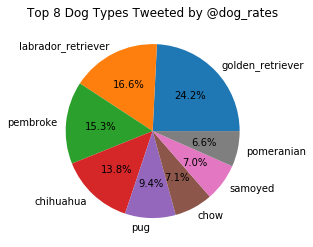

In [663]:
fig = plt.pie(tweet_archive_master.p1.value_counts().head(8), labels = tweet_archive_master.p1.value_counts().head(8).index.tolist(), autopct = '%1.1f%%');
plt.title('Top 8 Dog Types Tweeted by @dog_rates');

In [659]:
#Describe Master Data
tweet_archive_master['rating_fraction']=tweet_archive_master.rating_numerator/tweet_archive_master.rating_denominator

In [660]:
tweet_archive_master.describe()

tweet_id  rating_numerator  rating_denominator        doggo  \
count  1.994000e+03       1994.000000         1994.000000  1994.000000   
mean   7.358508e+17         12.280843           10.532096     0.037111   
std    6.747816e+16         41.497718            7.320710     0.189082   
min    6.660209e+17          0.000000            2.000000     0.000000   
25%    6.758475e+17         10.000000           10.000000     0.000000   
50%    7.084748e+17         11.000000           10.000000     0.000000   
75%    7.877873e+17         12.000000           10.000000     0.000000   
max    8.924206e+17       1776.000000          170.000000     1.000000   

           floofer       pupper        puppo      p1_conf       p2_conf  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1.994000e+03   
mean      0.004012     0.106319     0.011535     0.593941  1.344195e-01   
std       0.063229     0.308323     0.106805     0.271954  1.006807e-01   
min       0.000000     0.000000     0.000000     0.044333  1.011300e-08   
25%       0.000000     0.000000     0.000000     0.362857  5.393988e-02   
50%       0.000000     0.000000     0.000000     0.587635  1.174550e-01   
75%       0.000000     0.000000     0.000000     0.846285  1.951377e-01   
max       1.000000     1.000000     1.000000     1.000000  4.880140e-01   

            p3_conf  rating_fraction  
count  1.994000e+03      1994.000000  
mean   6.024848e-02         1.169249  
std    5.089067e-02         4.067071  
min    1.740170e-10         0.000000  
25%    1.619283e-02         1.000000  
50%    4.950530e-02         1.100000  
75%    9.159438e-02         1.200000  
max    2.734190e-01       177.600000

In [661]:
tweet_archive_master.to_csv('tweet_archive_master.csv')

#### Three Insights:
- Golden Retrievers are the most tweeted out dog by dog_rates
- dog_rates uses the class "pupper" the most frequently ~10% of the time
- The average rating given is 11.7/10